# 📌 **Smart Emergency Response System**

                                              +-----------------------------+
                                              |   Preprocessed 911 Logs     |
                                              |(message, timestamp, lat/lng)|
                                              +-------------+---------------+
                                                            |
                                                            v
                                              +-----------------------------+
                                              |   SentenceTransformer       |
                                              | → Converts text into        |
                                              |   numerical embeddings      |
                                              +-------------+---------------+
                                                            |
                                                            v
                                              +-----------------------------+
                                              |     Isolation Forest        |
                                              | → Builds random trees       |
                                              | → Isolates outliers faster  |
                                              +-------------+---------------+
                                                            |
                                                            v
                                              +-----------------------------+
                                              |   Anomaly Score Assigned    |
                                              |   -1 = Anomalous, 1 = Normal|
                                              +-------------+---------------+
                                                            |
                                                            v
                                              +-----------------------------+
                                              | Filter anomalies → Send to  |
                                              |     GenAI Agents            |
                                              +-----------------------------+


## 🔍 **Project Overview**  
This project is a step toward revolutionizing emergency response management by using an intelligent, multi-agent system. It automates the analysis of 911 emergency logs, detects anomalies, classifies emergencies, and assesses threat levels using advanced AI models. The goal is to improve emergency response efficiency by enabling smart decision-making based on real-time data.

## 💡 **Core Features**  
1. **Anomaly Detection**:  
   Employs Isolation Forest to detect unusual patterns or outliers in emergency logs, flagging potential emergencies or abnormalities.  

2. **Language Understanding**:  
   Utilizes SentenceTransformers to convert text-based emergency logs into dense vector representations, capturing nuanced meanings in emergency calls.  

3. **AI-Powered Classification**:  
   Leverages Google’s Gemini GenAI to analyze the content, classify the event type, assess threat levels, and suggest appropriate actions.  

4. **RAG for Contextual Intelligence**:  
   Incorporates a Retrieval-Augmented Generation approach to retrieve similar past emergencies, providing a data-backed decision support mechanism.  

5. **Real-Time Alerts**:  
   The system includes an alert system (mocked via Discord on Kaggle) to notify first responders or emergency managers in case of high-threat incidents.  

6. **Modular Flexibility**:  
   A modular design that allows toggling of features like GenAI processing or alerts for customized use cases.

## 🚀 **Technologies Used**  
- **Google Gemini API**:  
   Harnesses state-of-the-art AI models for real-time event classification and threat assessment.  

- **SentenceTransformers**:  
   Used to generate dense embeddings for emergency messages.  

- **Isolation Forest**:  
   Implements unsupervised anomaly detection to flag outlier events.  

- **RAG (Retrieval-Augmented Generation)**:  
   Retrieves historical emergency data to enrich decision-making.  

- **Matplotlib & Seaborn**:  
   Visualizes the anomaly detection results and insights effectively.  

- **Kaggle Secrets**:  
   Ensures secure integration of APIs and webhooks.  

- **JSON-based Communication**:  
   Facilitates easy and structured data exchange between agents.

## 🔁 **Key Use Cases**  
- **Real-Time Monitoring Dashboards**:  
   Create live views for emergency response teams to track current threats and anomalies.  

- **Proactive Alert Systems**:  
   Automate notifications for urgent situations, ensuring timely intervention.  

- **Crisis Pattern Recognition**:  
   Identify recurring emergencies or trends to guide future resource allocation or policy decisions.

---

## **Project as the First Step Toward an Advanced System**  
This project is more than just an anomaly detection tool—it's the first step toward creating a **multi-agent system** that addresses specific types of emergency cases. By classifying events such as traffic incidents, robberies, and medical emergencies, the system assesses threat levels and provides actionable insights, such as recommending the optimal placement of hospitals or emergency services.

As we scale, the system could serve as a foundational component for smart city infrastructure, improving resource allocation based on real-time threat detection and historical patterns. It can be extended to predict and prevent potential crises before they occur, enhancing public safety, and supporting emergency planners with data-driven strategies.

---

## **Next Steps in the Evolution of the System**  
1. **Integrating Additional Data Sources**:  
   Incorporate traffic, social media, and environmental data to enrich analysis.  

2. **Predictive Analytics**:  
   Move beyond reactive response by forecasting future emergencies based on trends.  

3. **Interactive Dashboards for Decision-Makers**:  
   Provide emergency managers with tools to make data-backed decisions in real-time.  

4. **IoT Integration**:  
   Connect traffic cameras, sensors, and other IoT devices to monitor live emergency events.  

5. **Scenario-Based Planning**:  
   Simulate large-scale emergencies to test response effectiveness and improve preparedness.

This **multi-agent emergency response system** aims to revolutionize how resources are allocated, improving public safety through predictive insights and faster decision-making.

# 📦 Import all necessary libraries including:
- pandas/numpy for data handling
 - sentence_transformers for embedding generation
 - sklearn for anomaly detection
 - google.genai for GenAI interactions
 - json, requests, re for API and text handling

In [1]:
# Emergency Log Anomaly Detection with GenAI Multi-Agent System (911 Data + Gemini + Alerts + RAG)

from google import genai
from google.genai import types

from IPython.display import Markdown

genai.__version__

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import requests
import random
from pathlib import Path
from google import genai
import time
import json 
import re

# Step 1: Load and Preprocess 911 Data

📂 Load real 911 emergency call data from Kaggle input

📉 Select relevant columns: title (renamed to message), timestamp, lat, lng. 

🧹 Clean NaNs and convert timestamp to datetime for consistency.

🎲 Randomly sample 100 logs for processing (to speed up for demo purposes)

In [2]:
# ------------------------
# Step 1: Load and Preprocess Real 911 Data (Switchable Source)
# ------------------------

dataset_path = Path("/kaggle/input/montcoalert/911.csv")
df = pd.read_csv(dataset_path)

log_df = df[['title', 'timeStamp', 'lat', 'lng']].dropna().copy()
log_df = log_df.rename(columns={"title": "message", "timeStamp": "timestamp"})
log_df['timestamp'] = pd.to_datetime(log_df['timestamp'])
log_df = log_df.sample(n=50, random_state=42).reset_index(drop=True)

# Step 2: Generate Embeddings


 🧠 Generate semantic vector embeddings for each emergency message using SentenceTransformer

 📌 These embeddings help detect message-level anomalies and compare semantic similarity

In [3]:
# ------------------------
# Step 2: Generate Embeddings (Open Source)
# ------------------------

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(log_df["message"].tolist())
log_df['embedding'] = embeddings.tolist()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

# Step 3: Anomaly Detection


 🚨 Apply Isolation Forest to detect unusual messages (unsupervised)

 ❗ Label -1 indicates anomaly, 1 indicates normal event

In [4]:
# ------------------------
# Step 3: Anomaly Detection
# ------------------------

clf = IsolationForest(contamination=0.2, random_state=42)
preds = clf.fit_predict(embeddings)
log_df["anomaly"] = preds

### Set up your API key

The `GOOGLE_API_KEY` environment variable can be set to automatically configure the underlying API. This works for both the official Gemini Python SDK and for LangChain/LangGraph. 

To run the following cell, your API key must be stored it in a [Kaggle secret](https://www.kaggle.com/discussions/product-feedback/114053) named `GOOGLE_API_KEY`.

If you don't already have an API key, you can grab one from [AI Studio](https://aistudio.google.com/app/apikey). You can find [detailed instructions in the docs](https://ai.google.dev/gemini-api/docs/api-key).

To make the key available through Kaggle secrets, choose `Secrets` from the `Add-ons` menu and follow the instructions to add your key or enable it for this notebook.

In [5]:
# ------------------------
# Specialized Emergency Agents
# ------------------------

from google import genai
import json
import re

class BaseEmergencyAgent:
    def __init__(self, api_key):
        self.client = genai.Client(api_key=api_key)

    def _send_to_gemini(self, prompt):
        try:
            answer = self.client.models.generate_content(
                model="gemini-2.0-flash",
                contents=prompt
            )
            raw_text = answer.candidates[0].content.parts[0].text
            cleaned = re.sub(r"```(?:json)?", "", raw_text).strip("`\n ")
            return json.loads(cleaned)
        except Exception as e:
            return {"error": str(e)}

class FireAgent(BaseEmergencyAgent):
    def run(self, message, location, timestamp):
        prompt = f"""
        You are a fire emergency response agent.
        Message: "{message}"
        Location: {location}
        Timestamp: {timestamp}

        Respond in JSON with event_type, threat_level, summary, recommendation.
        """
        return self._send_to_gemini(prompt)

class MedicalAgent(BaseEmergencyAgent):
    def run(self, message, location, timestamp):
        prompt = f"""
        You are a medical triage AI.
        Message: "{message}"
        Location: {location}
        Timestamp: {timestamp}

        Respond in JSON with event_type, threat_level, summary, recommendation.
        """
        return self._send_to_gemini(prompt)

# Placeholder mocks for future agents
class CrimeAgent(BaseEmergencyAgent): pass
class RescueAgent(BaseEmergencyAgent): pass
class TrafficAgent(BaseEmergencyAgent): pass
class HazmatAgent(BaseEmergencyAgent): pass
class WeatherAgent(BaseEmergencyAgent): pass

In [6]:
ENABLE_ALERTS = True  # Set to True to enable Discord alerts outside Kaggle
USE_AI_FOR_ROLE = True  # Set to True to use GenAI agent for role classification too

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_1 = user_secrets.get_secret("GOOGLE_API_KEY")


# ------------------------
# Agent Initialization
# ------------------------

fire_agent = FireAgent(api_key=secret_value_1)
medical_agent = MedicalAgent(api_key=secret_value_1)
crime_agent = CrimeAgent(api_key=secret_value_1)
rescue_agent = RescueAgent(api_key=secret_value_1)
traffic_agent = TrafficAgent(api_key=secret_value_1)
hazmat_agent = HazmatAgent(api_key=secret_value_1)
weather_agent = WeatherAgent(api_key=secret_value_1)

agent_map = {
    "FireAgent": fire_agent,
    "MedicalAgent": medical_agent,
    "CrimeAgent": crime_agent,
    "RescueAgent": rescue_agent,
    "TrafficAgent": traffic_agent,
    "HazmatAgent": hazmat_agent,
    "WeatherAgent": weather_agent
}

If you received an error response along the lines of `No user secrets exist for kernel id ...`, then you need to add your API key via `Add-ons`, `Secrets` **and** enable it.

![Screenshot of the checkbox to enable GOOGLE_API_KEY secret](https://storage.googleapis.com/kaggle-media/Images/5gdai_sc_3.png)

In [7]:
def classify_agent_type(message):
    prompt = f"""
    Based on the following emergency message, determine which emergency agent should handle it. Choose one from:
    FireAgent, MedicalAgent, CrimeAgent, RescueAgent, TrafficAgent, HazmatAgent, WeatherAgent or DefaultAgent.

    Message: "{message}"

    Respond in JSON: {{ "agent": "<AgentName>" }}
    """
    try:
        client = genai.Client(api_key=secret_value_1)
        answer = client.models.generate_content(
            model="gemini-2.0-flash",
            contents=prompt)
        raw_text = answer.candidates[0].content.parts[0].text
        cleaned = re.sub(r"```(?:json)?", "", raw_text).strip("`\n ")
        return json.loads(cleaned).get("agent")
    except Exception as e:
        print(f"Routing failed: {e}")
        return "Unknown"

# Step 4: GenAI Multi-Agent Setup



🤖 Define helper functions for role classification and threat level detection

🧠 If USE_AI_FOR_ROLE is True, use Gemini agent to classify the emergency type

📌 Otherwise, fallback to keyword-based logic

In [8]:
def run_gemini_agent(message, location, timestamp):
    if USE_AI_FOR_ROLE:
        agent_name = classify_agent_type(message)
        agent_map = {
            "FireAgent": fire_agent,
            "MedicalAgent": medical_agent,
            "CrimeAgent": crime_agent,
            "RescueAgent": rescue_agent
        }
        agent = agent_map.get(agent_name)
        if agent:
           return agent.run(message, location, timestamp)
        else:
            return {
                "event_type": "Unknown",
                "threat_level": "Low",
                "summary": f"Unknown classification: {message}",
                "recommendation": "Manual review recommended."
            }
    else:
        # fallback logic if not using AI for classification
        return {
            "event_type": "Unknown",
            "threat_level": "Low",
            "summary": f"AI classification disabled: {message}",
            "recommendation": "Fallback logic needed."
        }

# Step 5: Alert System (Mocked for Kaggle)

 📢 Trigger alert only for "High" or "Critical" threat events

 🔁 If ENABLE_ALERTS is True, send message to a Discord webhook (mocked in Kaggle)
 
 🧭 Includes Google Maps location link for incident context

In [9]:
# ------------------------
# Step 5: Alert System (Mock Discord for Kaggle Compatibility)
# ------------------------

def take_emergency_action(agent_response, lat, lng, timestamp):
    if agent_response.get("threat_level", "").lower() != "low":
        maps_url = f"https://www.google.com/maps?q={lat},{lng}"
        
        message =  f"""
                    🚨 **{agent_response.get('event_type', 'Unknown Emergency')} Detected!**
                    **Threat Level:** {agent_response.get('threat_level')}
                    📍 Location: [{lat}, {lng}]({maps_url})
                    🕒 Time: {timestamp}
                    
                    **Summary:** {agent_response.get('summary')}
                    **Recommendation:** {agent_response.get('recommendation')}
                    """
        
        if ENABLE_ALERTS:
            try:
                from kaggle_secrets import UserSecretsClient
                secret_value_0 = UserSecretsClient().get_secret("DISCORD_WEBHOOK")
                webhook_url=secret_value_0
                response = requests.post(webhook_url, json={"content": message})
                print(f"\n🚨 Discord alert sent! Response status: {response.status_code}")
            except Exception as e:
                print(f"\n⚠️ Failed to send alert: {str(e)}")
        else:
            print("\n[Mock Alert]\n" + message)

# Step 6: Apply Agents to Anomalies
 🔍 Filter only anomalous logs for deeper analysis
 
 🤝 For each anomaly:
 
 - Run Gemini agent (or fallback)
 - Retrieve similar past cases
 - Trigger emergency response logic

In [10]:
# ------------------------
# Step 6: Apply Agents to Anomalies
# ------------------------

anomalies = log_df[log_df["anomaly"] == -1].copy()


 # Step 6.1: Retrieve Similar Cases (RAG)
 📚 Implement a simple RAG (Retrieval-Augmented Generation) step
 
 🧭 Use cosine similarity to find top-3 most similar past incidents (based on message embedding)

In [11]:
# ------------------------
# Step 6.1: Add RAG System - Retrieve Similar Past Incidents
# ------------------------

def retrieve_similar_cases(current_embedding, top_k=3):
    all_embeddings = np.vstack(log_df['embedding'].values)
    sims = cosine_similarity([current_embedding], all_embeddings)[0]
    top_indices = sims.argsort()[-top_k-1:-1][::-1]
    return log_df.iloc[top_indices][['message', 'timestamp', 'lat', 'lng']].to_dict(orient='records')

def process_log(row):
    ts = row["timestamp"].isoformat()
    try:
        result = run_gemini_agent(row["message"], (row["lat"], row["lng"]), ts)
        if result is None:
            print(row["message"])
            raise ValueError("run_gemini_agent returned None ")

        try:
            result["similar_cases"] = retrieve_similar_cases(np.array(row['embedding']))
        except Exception as e:
            print(f"[RAG Retrieval Error] {e}")
            result["similar_cases"] = []
            
        threat_level = result.get("threat_level", "Low")  # Default to "Low" if threat_level is missing
        take_emergency_action(result, row["lat"], row["lng"], ts)
        time.sleep(4) 
        result["threat_level"] = threat_level
        return json.dumps(result, indent=2, default=str)

    except Exception as e:
        print(f"[Processing Error] {e}")
        return json.dumps({"error": str(e), "timestamp": ts, "message": row["message"]}, indent=2)


anomalies["agent_output"] = anomalies.apply(process_log, axis=1)
anomalies["threat_level"] = anomalies["agent_output"].apply(lambda x: json.loads(x).get("threat_level", "Low"))

#print(anomalies)


🚨 Discord alert sent! Response status: 204

🚨 Discord alert sent! Response status: 204

🚨 Discord alert sent! Response status: 204

🚨 Discord alert sent! Response status: 204

🚨 Discord alert sent! Response status: 204

🚨 Discord alert sent! Response status: 204

🚨 Discord alert sent! Response status: 204
Routing failed: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description':

# Step 7: Visualization

 📊 Visualize anomaly distribution in the dataset (Normal vs Anomalous)
 
 🖨️ Print a detailed summary of agent analysis for each anomaly

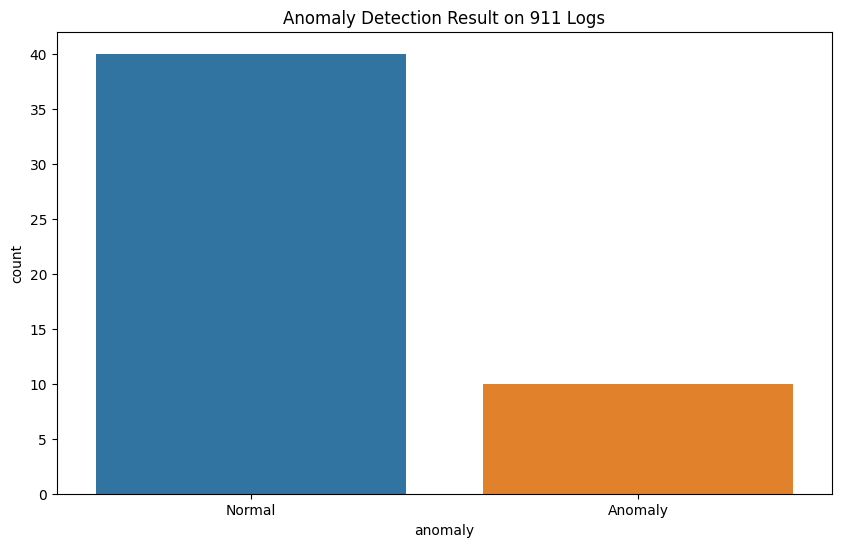

In [12]:
# ------------------------
# Step 7: Visualization
# ------------------------

plt.figure(figsize=(10, 6))
sns.countplot(x=log_df["anomaly"].map({1: "Normal", -1: "Anomaly"}))
plt.title("Anomaly Detection Result on 911 Logs")
plt.show()

## Threat Level Detection in Emergency Response Systems

### Importance of Threat Level Detection:
Threat level detection is vital in systems that handle emergencies, anomalies, or security threats. It plays a critical role in prioritizing resources, guiding decision-making, automating responses, and ensuring an efficient and effective reaction to incidents. Below are the key reasons why threat level detection is necessary:

### 1. **Prioritization of Resources**
   - Helps allocate resources to the most critical events, ensuring urgent situations receive immediate attention.

### 2. **Decision-Making Support**
   - Assists human responders and automated systems in making informed decisions based on the severity of the situation.

### 3. **Efficient Incident Classification**
   - Enables real-time classification of incidents, distinguishing between low, medium, and high threats to ensure appropriate responses.

### 4. **Automation of Emergency Response**
   - Facilitates automated triggering of actions like alerting responders, initiating protocols, or deploying emergency measures for high-level threats.

### 5. **Data-Driven Insights**
   - Allows tracking and analysis of threat

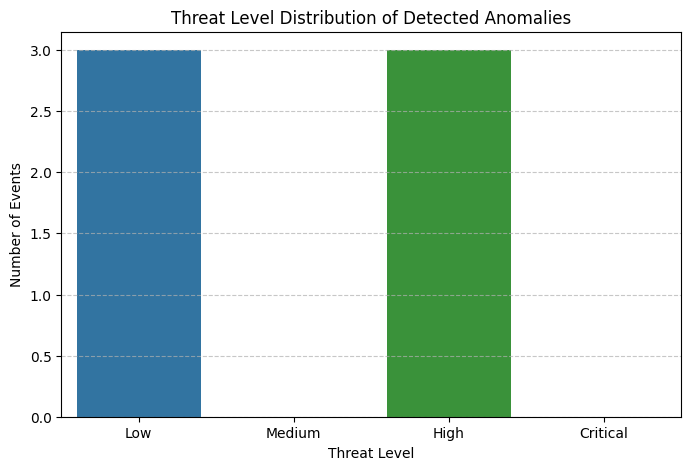

In [13]:
# -------------------------
# Threat Level Detection Graph
# -------------------------

plt.figure(figsize=(8, 5))
sns.countplot(data=anomalies, x="threat_level", order=["Low", "Medium", "High", "Critical"])
plt.title("Threat Level Distribution of Detected Anomalies")
plt.xlabel("Threat Level")
plt.ylabel("Number of Events")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Threat Level Distribution by Hour of Day

### Purpose:
This analysis aims to visualize the distribution of threat levels throughout the day, helping identify potential patterns or peak times when higher threat levels occur. By understanding the relationship between time and threat levels, emergency response systems can optimize their readiness and allocate resources more effectively.

### Steps Taken:
1. **Convert Timestamp to DateTime Object:**
   - The `timestamp` column in the `anomalies` dataset is converted to a datetime object, ensuring proper handling of time-related data.

2. **Extract Hour of the Day:**
   - The hour of the day is extracted from the `timestamp` field, providing a useful feature to examine trends throughout the day. The new column, `hour`, represents the hour value for each event.

3. **Create Pivot Table:**
   - A pivot table is created, with the `hour` as rows and `threat_level` as columns. The `size` function is used to count the occurrences of each threat level per hour, filling missing values with 0.

4. **Plot Heatmap:**
   - A heatmap is plotted to visualize the frequency of different threat levels across each hour of the day. The heatmap uses color intensity to represent the number of occurrences, providing a clear and intuitive view of trends.

### Insights:
- The heatmap provides a visual representation of how threat levels vary by time of day.
- It helps identify if certain hours (e.g., night vs. day) show higher threat levels, suggesting when the system should be more alert or ready for action.
  
### Conclusion:
The heatmap of "Threat Level Distribution by Hour of Day" allows for a deeper understanding of the temporal patterns in threat occurrences, enabling better planning and allocation of resources to respond to emergencies based on the time of day.

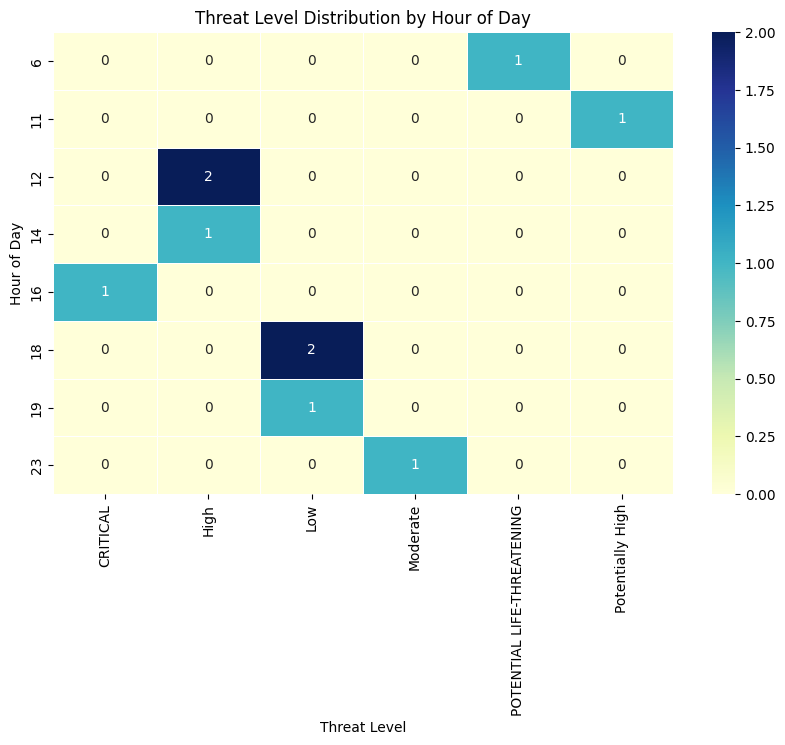

In [14]:
# Convert timestamp to a datetime object if it isn't already
anomalies["timestamp"] = pd.to_datetime(anomalies["timestamp"])

# Extract hour of the day from the timestamp
anomalies["hour"] = anomalies["timestamp"].dt.hour

# Create a pivot table for heatmap
heatmap_data = anomalies.pivot_table(index="hour", columns="threat_level", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Threat Level Distribution by Hour of Day")
plt.ylabel("Hour of Day")
plt.xlabel("Threat Level")
plt.show()

## Anomalous Log and Agent Analysis Output

### Purpose:
This section is designed to iterate over each log in the `anomalies` dataset, display the relevant information, and provide a detailed analysis from the agent’s perspective. The output includes both the original log details and the analysis results produced by the agent, helping stakeholders understand the context and suggested actions.

### Steps Taken:
1. **Iterating Over Anomalous Logs:**
   - The code loops through each row in the `anomalies` DataFrame using `iterrows()`. This allows us to access each log's details, including the message, timestamp, and geographical coordinates (`lat`, `lng`).

2. **Displaying Log Information:**
   - For each log, the message, timestamp, and location (latitude and longitude) are printed to the console. This gives context to the log, helping the user understand the specific anomaly.

3. **Extracting Agent Analysis:**
   - The `agent_output` for each row, which contains the agent's analysis, is loaded from JSON format into a Python dictionary.
   - This analysis, which may include threat levels, suggested actions, and other relevant data, is then printed in a well-formatted JSON structure for easy readability.

### Output:
- The printed output includes both the raw log data and the processed agent analysis for each anomalous event.
- This helps in evaluating whether the agent's analysis aligns with expectations and allows further inspection of the agent's decision-making process.

### Example Output:
==== Anomalous Log ====

Message: Fire: VEHICLE ACCIDENT
Time: 2016-04-23 12:51:46
Location: (40.2659446, -75.2771874)

== Agent Analysis ==

{
  "event_type": "Vehicle Accident Fire",
  "threat_level": "High",
  "summary": "Report indicates a vehicle accident involving fire at GPS coordinates 40.2659446, -75.2771874. Time of report: 2016-04-23T12:51:46. Potential for injuries, escalating fire, and traffic disruption.",
  "recommendation": "Dispatch fire suppression units, emergency medical services, and law enforcement to the location immediately. Prioritize scene safety and victim rescue. Establish traffic control and assess the extent of the fire and injuries upon arrival. Consider requesting additional resources based on initial assessment.",
  "similar_cases": [
    {
      "message": "Traffic: VEHICLE ACCIDENT -",
      "timestamp": "2018-08-27 09:12:42",
      "lat": 40.1666567,
      "lng": -75.1464961
    },
    {
      "message": "Traffic: VEHICLE ACCIDENT -",
      "timestamp": "2017-09-11 13:17:31",
      "lat": 40.2212266,
      "lng": -75.2887369
    },
    {
      "message": "Traffic: VEHICLE ACCIDENT -",
      "timestamp": "2019-10-28 14:12:47",
      "lat": 40.146865,
      "lng": -75.3952095
    }
  ]
}

### Conclusion:
This section is essential for debugging and refining the agent’s logic. By printing both the raw log and the agent’s output, users can verify the correctness of the agent’s responses and improve the system if needed. This also aids in understanding how the agent interprets various emergency logs and takes necessary actions based on past similar incidents.

In [15]:
# Print Results
for i, row in anomalies.iterrows():
    print("\n==== Anomalous Log ====")
    print(f"Message: {row['message']}\nTime: {row['timestamp']}\nLocation: ({row['lat']}, {row['lng']})")
    output = json.loads(row["agent_output"])
    print("\n== Agent Analysis ==")
    print(json.dumps(output, indent=2))


==== Anomalous Log ====
Message: Fire: VEHICLE ACCIDENT
Time: 2016-04-23 12:51:46
Location: (40.2659446, -75.2771874)

== Agent Analysis ==
{
  "event_type": "Vehicle Accident Fire",
  "threat_level": "High",
  "summary": "Report of a vehicle accident involving a fire. Location: 40.2659446, -75.2771874. Time: 2016-04-23T12:51:46. Presence of fire indicates potential for serious injury, explosion, and spread of fire to surrounding environment.",
  "recommendation": "Dispatch fire suppression units and emergency medical services (EMS) immediately to the location. Coordinate with law enforcement for traffic control and scene safety. Assess for hazardous materials involvement upon arrival. Establish a perimeter and initiate fire suppression activities. Prioritize rescue and medical assistance for any victims.",
  "similar_cases": [
    {
      "message": "Traffic: VEHICLE ACCIDENT -",
      "timestamp": "2018-08-27 09:12:42",
      "lat": 40.1666567,
      "lng": -75.1464961
    },
    {


## 🔍 GenAI Evaluation

To evaluate the quality of GenAI outputs, we analyze a sample of agent responses and assess their:

- **Accuracy**: Does the event type and threat level match the context of the message?
- **Consistency**: Are similar messages classified similarly?
- **Usefulness**: Are the summaries and recommendations actionable?

Below is an example evaluation:

In [16]:
# Select a few example messages to evaluate agent outputs
sample_eval = anomalies.sample(5, random_state=42)

for idx, row in sample_eval.iterrows():
    output = json.loads(row["agent_output"])
    print(f"\nMessage: {row['message']}")
    print(f"⛑ Event Type: {output.get('event_type')}")
    print(f"⚠️ Threat Level: {output.get('threat_level')}")
    print(f"📝 Summary: {output.get('summary')}")
    print(f"💡 Recommendation: {output.get('recommendation')}")
    print(f"🕵️ Manual Evaluation: {'Looks Good ✅' if output.get('threat_level') in ['Medium', 'High', 'Critical'] else 'May Need Review 🔍'}")


Message: Fire: CARBON MONOXIDE DETECTOR
⛑ Event Type: CARBON MONOXIDE DETECTOR ALERT
⚠️ Threat Level: POTENTIAL LIFE-THREATENING
📝 Summary: Carbon monoxide detection reported at location (40.1983095, -75.2998049) at 2018-01-26T06:44:04. This indicates a potential source of carbon monoxide, which is a colorless, odorless, and poisonous gas.
💡 Recommendation: IMMEDIATELY DISPATCH FIRE RESCUE TEAM TO LOCATION.  Initiate standard carbon monoxide incident protocols, including ventilation, source identification, and occupant evacuation and medical assessment for potential CO poisoning. Prioritize rapid response due to the life-threatening nature of carbon monoxide exposure.
🕵️ Manual Evaluation: May Need Review 🔍

Message: Traffic: HAZARDOUS ROAD CONDITIONS -
⛑ Event Type: Unknown
⚠️ Threat Level: Low
📝 Summary: Unknown classification: Traffic: HAZARDOUS ROAD CONDITIONS -
💡 Recommendation: Manual review recommended.
🕵️ Manual Evaluation: May Need Review 🔍

Message: EMS: ALTERED MENTAL STATU